# Classification of Income Statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from numpy import mean, std

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Exploratory Data Analysis

**Income - Target column**

<AxesSubplot:xlabel='income', ylabel='count'>

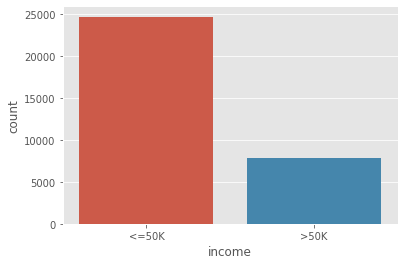

In [4]:
sns.countplot(df.income)

there is class imbalance in between <=50k and >50k. So, we'll perform random oversampling while preparing training sets.


**Age**

<AxesSubplot:xlabel='age', ylabel='Density'>

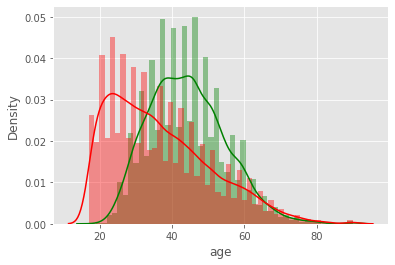

In [5]:
sns.distplot(df[df.income==">50K"].age, color='g')
sns.distplot(df[df.income=="<=50K"].age, color='r')

we can see most of the values of <=50K lie before approx. 30 and for >50k lie after 30, so we'll make a partition there.

**Workclass**

<AxesSubplot:xlabel='workclass', ylabel='count'>

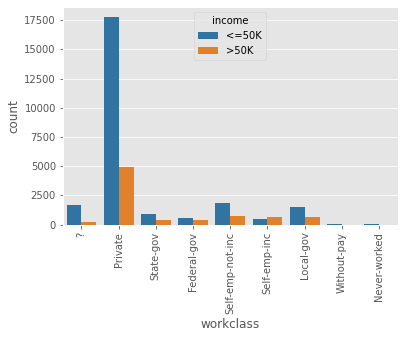

In [6]:
plt.xticks(rotation=90)
sns.countplot(df.workclass, hue=df.income, palette='tab10')

Here majority lie in private, so we can allot '?' to private, and segregate rest in private, gov and not in employment. 

**fnlwgt**

<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

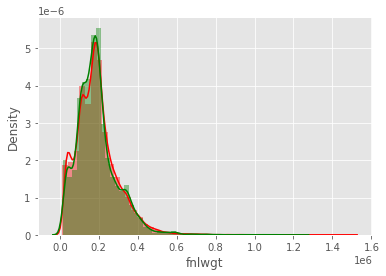

In [7]:
sns.distplot(df[df.income=='<=50K'].fnlwgt, color='r')
sns.distplot(df[df.income=='>50K'].fnlwgt, color='g')

here peak lies at 200000 so we'll add a breakpoint there.

**Education**

<AxesSubplot:xlabel='education', ylabel='count'>

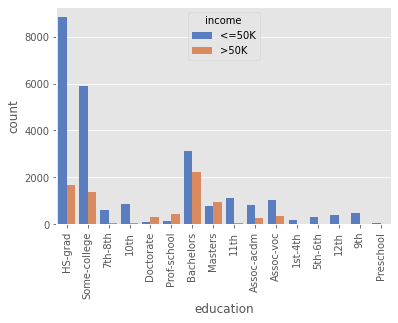

In [8]:
plt.xticks(rotation=90)
sns.countplot(df.education, hue=df.income, palette='muted')

**education.num**

<AxesSubplot:xlabel='education.num', ylabel='count'>

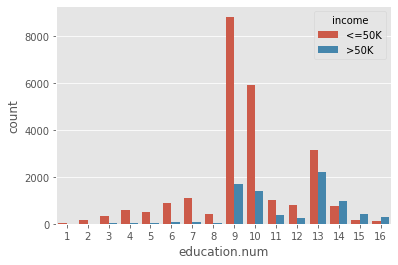

In [9]:
sns.countplot(df["education.num"], hue=df.income)

**marital.status**

<AxesSubplot:xlabel='marital.status', ylabel='count'>

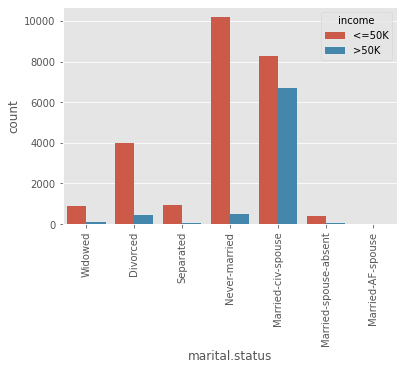

In [10]:
plt.xticks(rotation=90)
sns.countplot(df['marital.status'], hue=df.income)

we can seperate our data into married and not married. (also note majority lies in married-civ-spouse)

**occupation**

<AxesSubplot:xlabel='occupation', ylabel='count'>

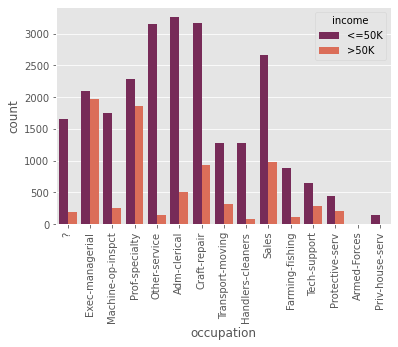

In [11]:
plt.xticks(rotation=90)
sns.countplot(df.occupation, hue=df.income, palette='rocket')

here we can see that Exec-manager and Prof-spec have high >50k values while craft-repair and sales are also considerable.

**relationship**

<AxesSubplot:xlabel='relationship', ylabel='count'>

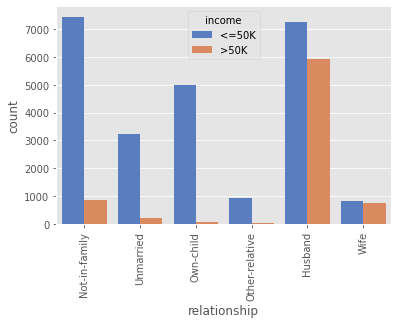

In [12]:
plt.xticks(rotation=90)
sns.countplot(df.relationship, hue=df.income, palette='muted')

here we can seperate by married or not, i.e Husband-Wife and rest.

**race**

<AxesSubplot:xlabel='race', ylabel='count'>

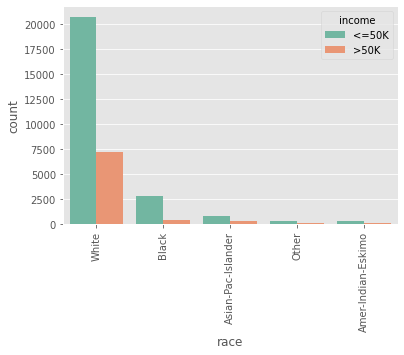

In [13]:
plt.xticks(rotation=90)
sns.countplot(df.race, hue=df.income, palette='Set2')

note majority of values lie in white, so we'll segregate by white and rest.

**sex**

<AxesSubplot:xlabel='sex', ylabel='count'>

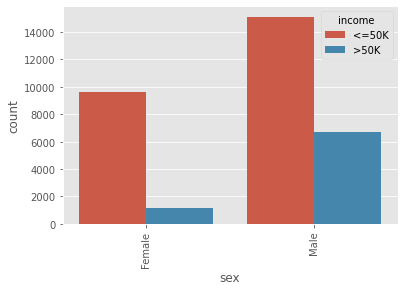

In [14]:
plt.xticks(rotation=90)
sns.countplot(df.sex, hue=df.income)

**capital.gain**

In [15]:
df['capital.gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1639         1
5060         1
6097         1
1455         1
7978         1
Name: capital.gain, Length: 119, dtype: int64

**capital.loss**

In [16]:
df['capital.loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1485       51
        ...  
2467        1
1539        1
155         1
2282        1
1411        1
Name: capital.loss, Length: 92, dtype: int64

**hours.per.week**

<AxesSubplot:xlabel='hours.per.week', ylabel='Density'>

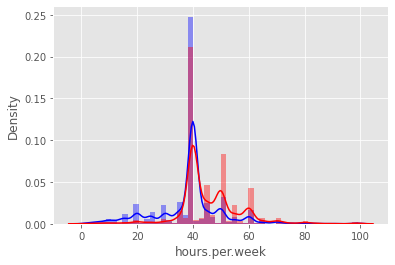

In [17]:
sns.distplot(df[df.income=='<=50K']['hours.per.week'], color='b')
sns.distplot(df[df.income=='>50K']['hours.per.week'], color='r')

**native.country**

In [18]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

## Preprocessing

### Finding and Handling Missing Data

in this dataset missing values were marked as '?' so we'll handel them

In [19]:
df[df.select_dtypes("object") =="?"] = np.nan
nans = df.isnull().sum()
if len(nans[nans>0]):
    print("Missing values detected.\n")
    print(nans[nans>0])
else:
    print("No missing values. You are good to go.")

Missing values detected.

workclass         1836
occupation        1843
native.country     583
dtype: int64


In [20]:
#majority of the values are "Private". Lets fill the missing values as "Private".
df.workclass.fillna("Private", inplace=True)

df.occupation.fillna(method='bfill', inplace=True)

#majority of the values are "United-States". Lets fill the missing values as "United-States".
df['native.country'].fillna("United-States", inplace=True)

print("Handled missing values successfully.")

Handled missing values successfully.


In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import column_or_1d

class MyLabelEncoder(LabelEncoder):

    def fit(self, y, arr=[]):
        y = column_or_1d(y, warn=True)
        if arr == []:
            arr=y
        self.classes_ = pd.Series(arr).unique()
        return self

le = MyLabelEncoder()

### Feature Engineering and Encoding the columns

In [22]:
df['age_enc'] = df.age.apply(lambda x: 1 if x > 30 else 0)

def prep_workclass(x):
    if x == 'Never-worked' or x == 'Without-pay':
        return 0
    elif x == 'Private':
        return 1
    elif x == 'State-gov' or x == 'Local-gov' or x == 'Federal-gov':
        return 2
    elif x == 'Self-emp-not-inc':
        return 3
    else:
        return 4

df['workclass_enc'] = df.workclass.apply(prep_workclass)

df['fnlwgt_enc'] = df.fnlwgt.apply(lambda x: 0 if x>200000 else 1)

le.fit(df.education, arr=['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th', 
                                             'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Some-college', 'Bachelors', 'Masters', 'Doctorate'])
df['education_enc'] = le.transform(df.education)

df['education.num_enc'] = df['education.num'].apply(lambda x: 1 if x>=9 else 0)

df['marital.status_enc'] = df['marital.status'].apply(lambda x: 1 if x=='Married-civ-spouse' or x == 'Married-AF-spouse' else 0)

def prep_occupation(x):
    if x in ['Prof-specialty', 'Exec-managerial']:
        return 2
    elif x in ['Sales', 'Craft-repair']:
        return 1
    else:
        return 0

df['occupation_enc'] = df.occupation.apply(prep_occupation)

df['relationship_enc'] = df.relationship.apply(lambda x: 1 if x in ['Husband', 'Wife'] else 0)

df['race_enc'] = df.race.apply(lambda x: 1 if x=='White' else 0)

df['sex_enc'] = df.sex.apply(lambda x: 1 if x=='Male' else 0)

df['capital.gain_enc'] = pd.cut(df["capital.gain"], bins=[-1,0,df[df["capital.gain"]>0]["capital.gain"].median(), df["capital.gain"].max()], labels=(0,1,2)).astype('int64')

df['capital.loss_enc'] = pd.cut(df["capital.loss"], bins=[-1,0,df[df["capital.loss"]>0]["capital.loss"].median(), df["capital.loss"].max()], labels=(0,1,2)).astype('int64')

df['hours.per.week_enc'] = pd.qcut(df['hours.per.week'], q=5, labels=(0,1,2,3), duplicates='drop').astype('int64')

df['native.country_enc'] = df['native.country'].apply(lambda x: 1 if x=='United-States' else 0)

df['income_enc'] = df.income.apply(lambda x: 1 if x==">50K" else 0)

print("Encoding complete.")

Encoding complete.


In [23]:
df.select_dtypes("object").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32561 non-null  object
 1   education       32561 non-null  object
 2   marital.status  32561 non-null  object
 3   occupation      32561 non-null  object
 4   relationship    32561 non-null  object
 5   race            32561 non-null  object
 6   sex             32561 non-null  object
 7   native.country  32561 non-null  object
 8   income          32561 non-null  object
dtypes: object(9)
memory usage: 2.2+ MB


In [24]:
#dropping encoded columns - education, sex, income
df.drop(['education', 'sex', 'income'], 1, inplace=True)

### Label Encoding without Feature Engineering

In [25]:
for feature in df.select_dtypes("object").columns:
    df[feature]=le.fit_transform(df[feature])

### Feature Selection

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 32561 non-null  int64
 1   workclass           32561 non-null  int64
 2   fnlwgt              32561 non-null  int64
 3   education.num       32561 non-null  int64
 4   marital.status      32561 non-null  int64
 5   occupation          32561 non-null  int64
 6   relationship        32561 non-null  int64
 7   race                32561 non-null  int64
 8   capital.gain        32561 non-null  int64
 9   capital.loss        32561 non-null  int64
 10  hours.per.week      32561 non-null  int64
 11  native.country      32561 non-null  int64
 12  age_enc             32561 non-null  int64
 13  workclass_enc       32561 non-null  int64
 14  fnlwgt_enc          32561 non-null  int64
 15  education_enc       32561 non-null  int64
 16  education.num_enc   32561 non-null  int6

<BarContainer object of 26 artists>

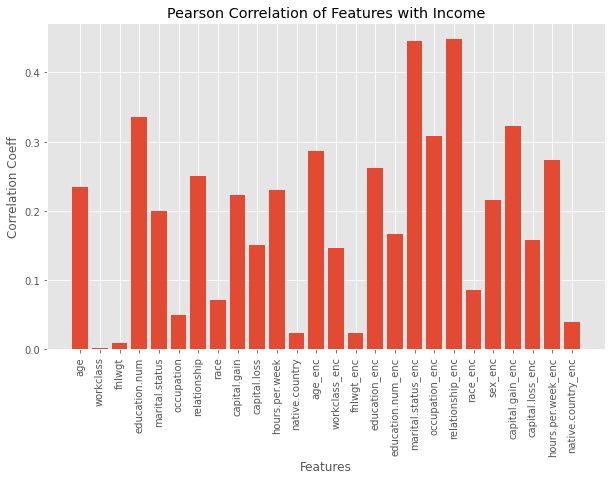

In [27]:
pcorr = df.drop('income_enc',1).corrwith(df.income_enc)
plt.figure(figsize=(10,6))
plt.title("Pearson Correlation of Features with Income")
plt.xlabel("Features")
plt.ylabel("Correlation Coeff")
plt.xticks(rotation=90)
plt.bar(pcorr.index, list(map(abs,pcorr.values)))

we'll drop columns with low correlation


In [28]:
df.drop(['workclass', 'fnlwgt','occupation', 'race', 'native.country', 'fnlwgt_enc', 'race_enc', 'native.country_enc'], 1, inplace=True)

<AxesSubplot:>

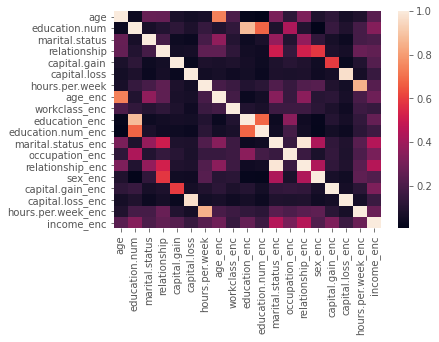

In [29]:
sns.heatmap(df.corr().apply(abs))

**Dropping redundant features**

here we'll drop redundant features (i.e we'll keep either enc values or normal, not both), then from this heat map we can also infer that relationship_enc and marital.status_enc, education_enc, education.num_enc and education.num have high correlation, so we'll only keep one of them.

In [30]:
df.drop(['age', 'education.num_enc', 'education_enc', 'marital.status_enc', 'capital.gain', 'capital.loss', 'hours.per.week'], 1, inplace = True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   education.num       32561 non-null  int64
 1   marital.status      32561 non-null  int64
 2   relationship        32561 non-null  int64
 3   age_enc             32561 non-null  int64
 4   workclass_enc       32561 non-null  int64
 5   occupation_enc      32561 non-null  int64
 6   relationship_enc    32561 non-null  int64
 7   sex_enc             32561 non-null  int64
 8   capital.gain_enc    32561 non-null  int64
 9   capital.loss_enc    32561 non-null  int64
 10  hours.per.week_enc  32561 non-null  int64
 11  income_enc          32561 non-null  int64
dtypes: int64(12)
memory usage: 3.0 MB


In [32]:
X = df.drop('income_enc', 1)
y = df.income_enc

### Train Test Split (3:1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [34]:
print("No. of rows in training data:",X_train.shape[0])
print("No. of rows in testing data:",X_test.shape[0])

No. of rows in training data: 24420
No. of rows in testing data: 8141


### Random Over Sampling

There was imbalance in our target class, which might result in wrong values for minority class, so we'll peform random over sampling to fix that.

In [35]:
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [36]:
y_over.value_counts()

0    18539
1     9269
Name: income_enc, dtype: int64

## Model Preparation

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

In [60]:
seed = 2**32 -1

In [61]:
models = [
    ('LR',LogisticRegression(random_state=seed)),
    ('SVC',SVC(random_state=seed)),
    ('AB',AdaBoostClassifier(random_state=seed)),
    ('ET',ExtraTreesClassifier(random_state=seed)),
    ('GB',GradientBoostingClassifier(random_state=seed)),
    ('RF',RandomForestClassifier(random_state=seed)),
    ('XGB',XGBClassifier(random_state=seed,eval_metric='logloss')),
    ('LGBM',LGBMClassifier(random_state=seed)),
    ('KNN',KNeighborsClassifier()),
    ('NB',GaussianNB()),
    ('DT',DecisionTreeClassifier(random_state=seed)),
    ('MLP',MLPClassifier(random_state=seed))
]

In [62]:
name_scores=[]
for model in models:
    model[1].fit(X_over,y_over)
    print(model[0]," trained.")
    name_scores.append((model[0],100*model[1].score(X_test,y_test)))
name_scores.sort(key=lambda x:x[1])
print("Results are ready.")

LR  trained.
SVC  trained.
AB  trained.
ET  trained.
GB  trained.
RF  trained.
XGB  trained.
LGBM  trained.
KNN  trained.
NB  trained.
DT  trained.
MLP  trained.
Results are ready.


In [63]:
def plot_scores(name_scores):
    names = [x[0] for x in name_scores]
    scores = [x[1] for x in name_scores]
    plt.ylim(ymax = max(scores)+0.5, ymin = min(scores)-0.5)
    plt.xticks(rotation=45)
    s = sns.barplot(names,scores)
    for x,y in enumerate(scores):
        s.text(x,y+0.1,round(y,2),ha="center")

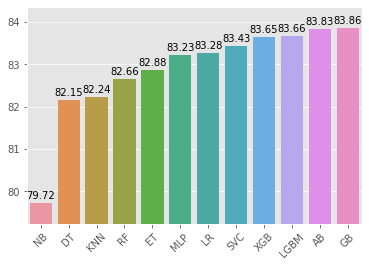

In [64]:

plot_scores(name_scores)